In [31]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct
from plot_tools import *
import make_plots
from scipy import stats
import add_obs
from pynbody.plot.stars import moster

In [32]:
path = "/scratch/hc2347/pickles/60/run0324.p"
entryReal, entryFalse = loadClassify(path)

In [33]:
isolated = pickle.load(open("/scratch/hc2347/pickles/iso/00832.p", "rb"))
data = pickle.load(open("/scratch/hc2347/pickles/60/run0324.p", "rb"))

isolated_ids = []
non_isolated_ids = []
for k, v in isolated.items():
    if v == True:
        isolated_ids.append(k)
    if v == False:
        non_isolated_ids.append(k)

print(len(isolated_ids))
print(len(non_isolated_ids))

iso_ids_filtered = []
noniso_ids_filtered = []
for halo in data:
    if isolated[halo['ID']] == True:
        iso_ids_filtered.append(halo['ID'])
    if isolated[halo['ID']] == False:
        noniso_ids_filtered.append(halo['ID'])
        
print("Filterd halos that are isolated", len(iso_ids_filtered))
print("Filtered halos that are non-isolated", len(noniso_ids_filtered))

105436
14410
Filterd halos that are isolated 60884
Filtered halos that are non-isolated 2851


In [8]:
path = "/scratch/hc2347/pickles/60/run0324.p"
entry = plot_tools.load_halos_pickle(path)
entry_iso = load_iso(path)
entry_non = load_iso(path, isostatus=False)
entry["zred"] = 0.205


print(len(entry_non['npart']))

2851


/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


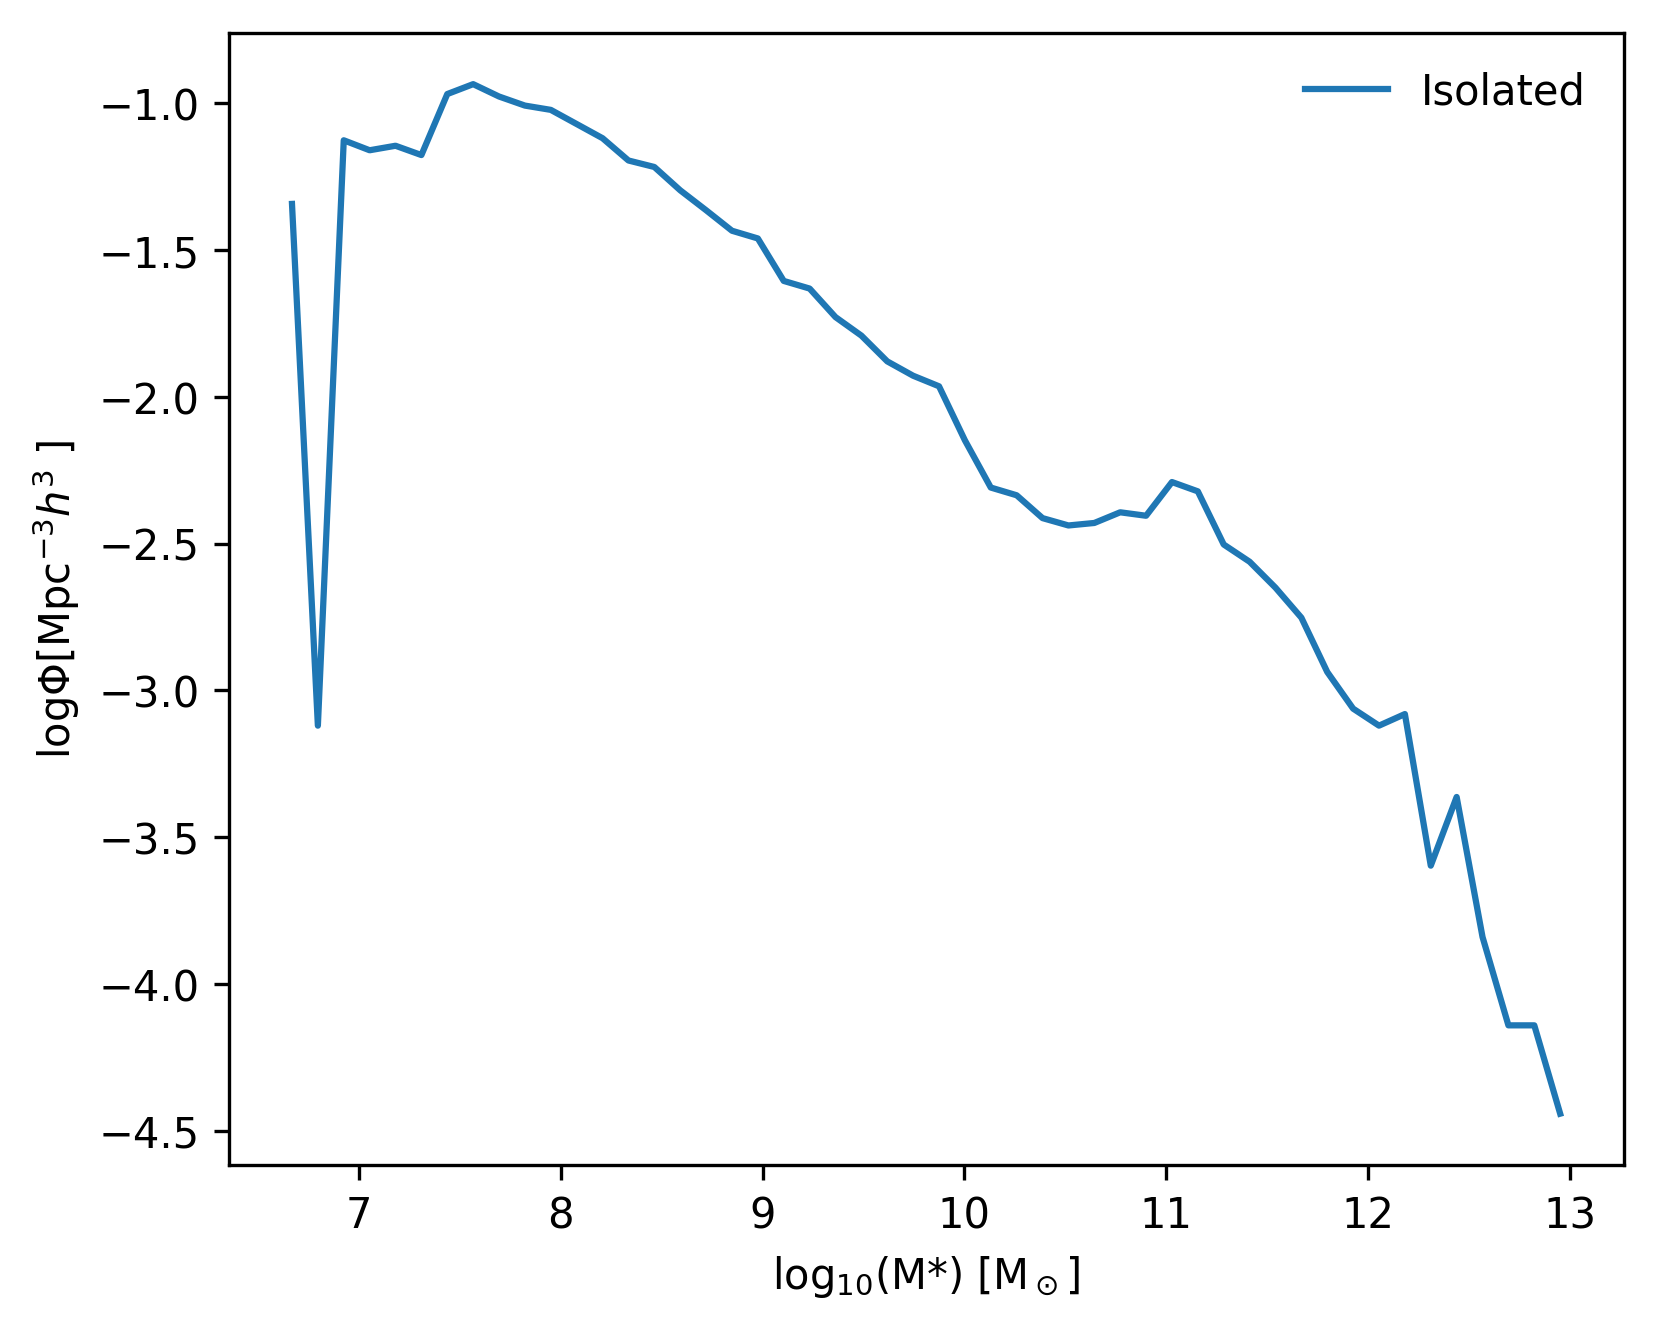

In [35]:
# Stellar Mass Function

smi = plot_tools.filter_list(entry['mstar'], 1e-5, 1e20)
#smn = plot_tools.filter_list(entry_non['mstar'], 1e-5, 1e20)

fig, ax = plt.subplots(figsize=(6,5), dpi = 300)

def plot_smf(mstar, size, label):
    mstar = plot_tools.filter_list(mstar, 1, 1e20)
    logM = np.log10(mstar)
    nbins = 50
    V = size**3
    Phi, edg = np.histogram(logM, bins=nbins)    #Unnormalized histogram and bin edges
    dM = edg[1] - edg[0]
    Max = np.array(edg[0:-1]) + dM/2
    Phi = Phi/V/dM
    ax.plot(Max, np.log10(Phi), label=label)
    ax.fill_between(Max, np.log10(Phi + np.sqrt(Phi)), np.log10(Phi - np.sqrt(Phi)))

plot_smf(smi, 60, 'Isolated')
#plot_smf(smn, 60, 'Non-Isolated')
ax.set_ylabel(r'$\mathrm{log}\Phi [\mathrm{Mpc}^{-3} h^3$ ]')
ax.set_xlabel('log$_{10}$(M*) [M$_\odot$]')

# mortlock2 = np.genfromtxt('obs/Mortlock_2013_SMF_z2.csv', unpack=True, skip_header=1, delimiter=',')
# ax.plot(mortlock2[0], mortlock2[1], label="Mortlock et al. 2013", marker = 'x', linestyle = "None", color = 'tab:purple')
# tomczak2 = np.genfromtxt('obs/Tomczak_2014_SMF_z2.csv', unpack=True, skip_header=1, delimiter=',')
# ax.plot(tomczak2[0], tomczak2[4], ls = 'None', marker = '*', label = "Tomczak et al. 2014", color = 'tab:cyan')


ax.legend(frameon=False)
plt.savefig("/scratch/hc2347/reports/resolution_SMF.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


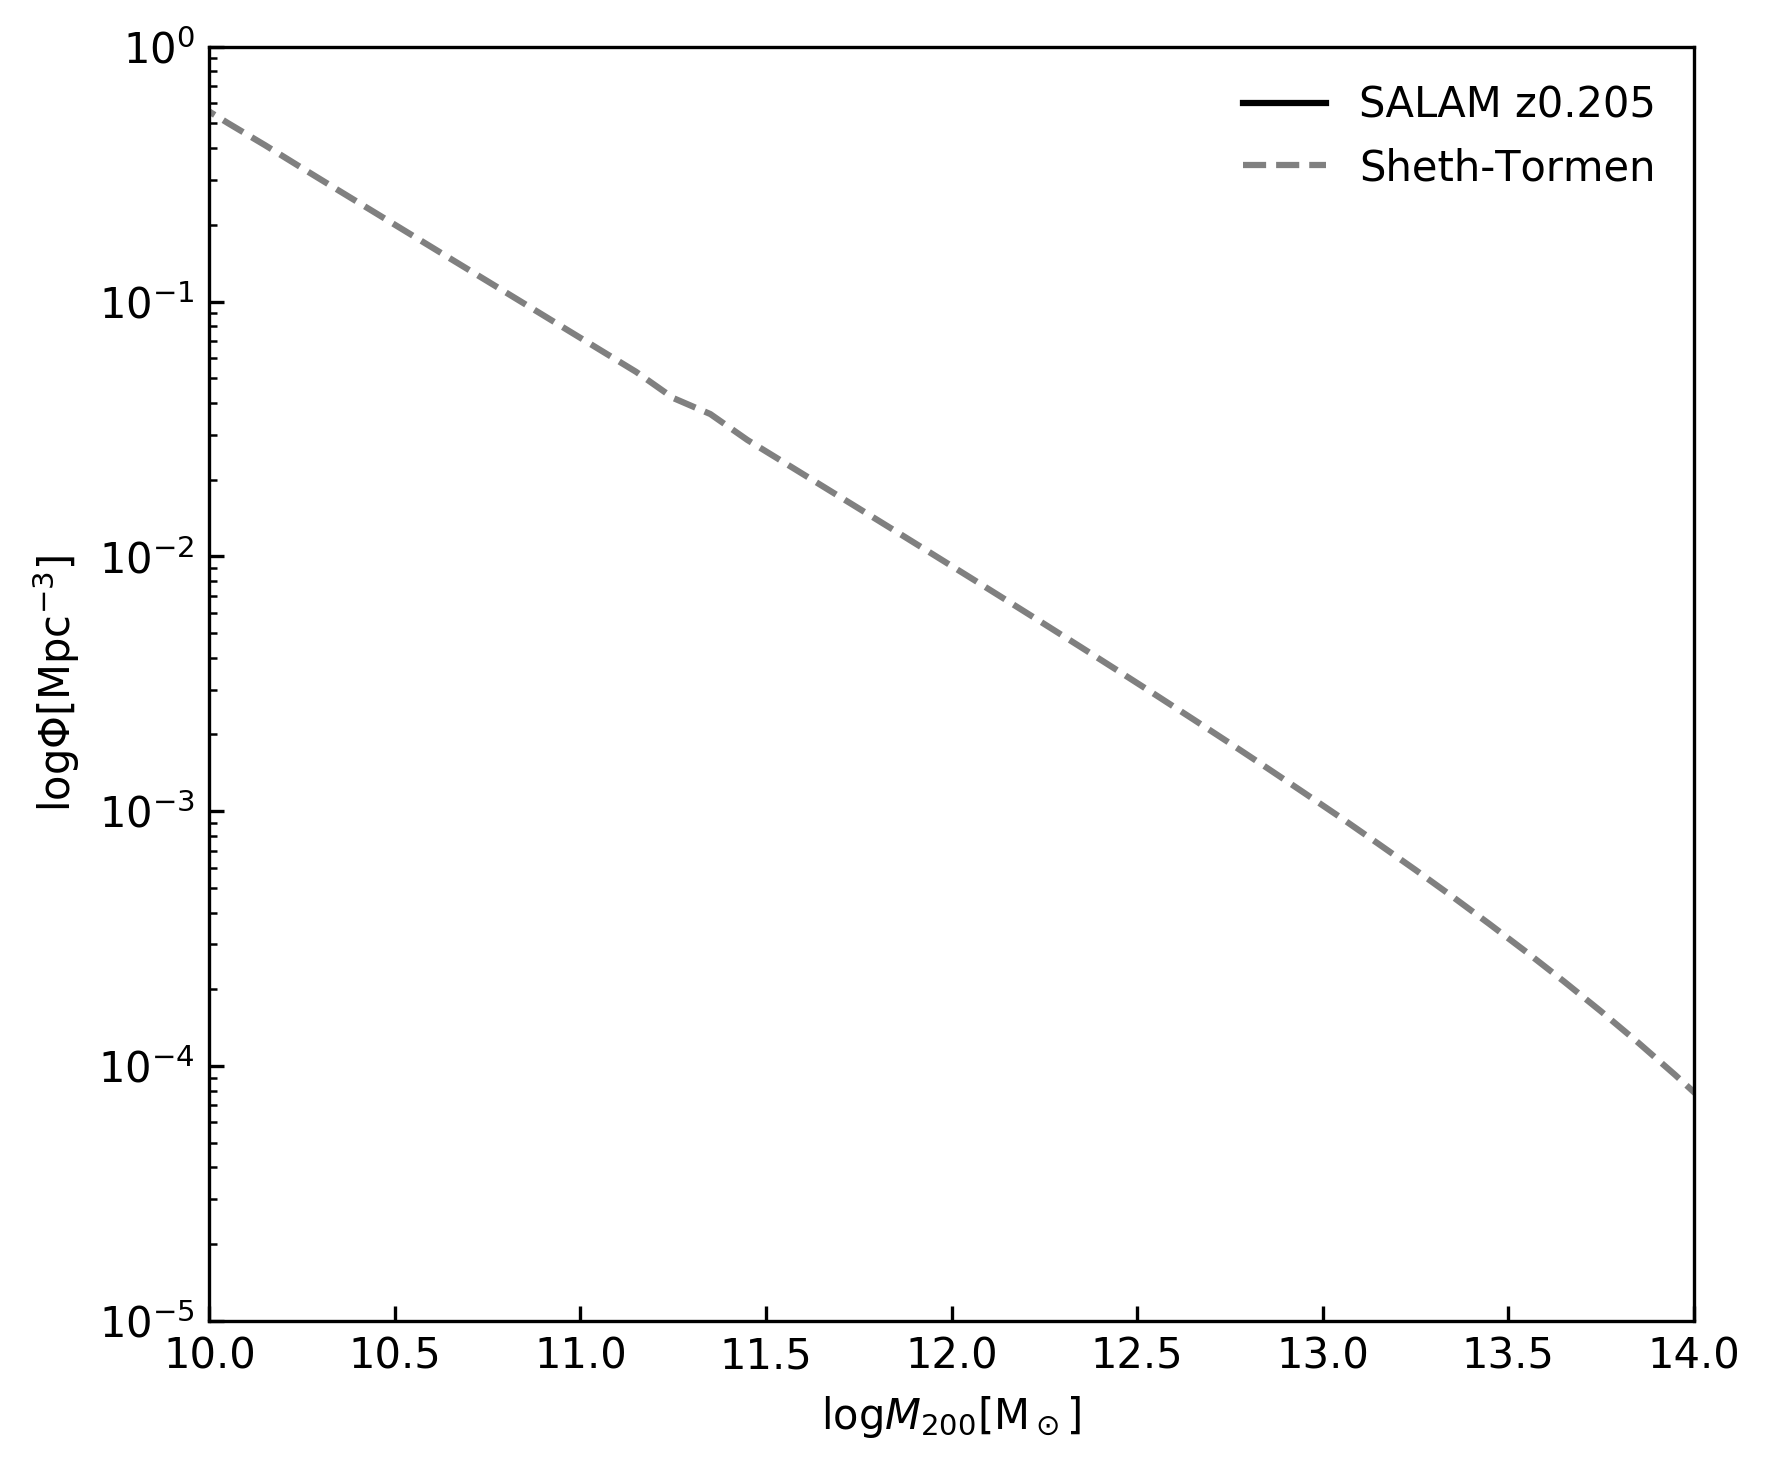

In [80]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['mathtext.fontset'] = 'custom'



fig, ax = plt.subplots(figsize=(6,5), dpi =300)
z = 0.205
s = pynbody.load("/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00832")

x, hmf, hmferr = plot_smf(plot_tools.filter_list(entry["mvir"],10**10,10**15),60)


# x2, hmf2 = plot_tools.plot_mf(ax,plot_tools.filter_list(entry_iso["mvir"],10**10,10**15),50,z)
# x3, hmf3 = plot_tools.plot_mf(ax,plot_tools.filter_list(entry_non["mvir"],10**10,10**15),50,z)

# x, hmf = do_filter(x, hmf, 0)
x3, hmf3 = do_filter(x3, hmf3, 0)
ax.plot(x, np.log10(hmf), label = "SALAM z{}".format(entry['zred']), color = 'black')
ax.fill_between(x, np.log10(hmf + hmferr), np.log10(hmf-hmferr), alpha = 0.2)
# ax.plot(x2, hmf2, color = "tab:pink", label = "isolated".format(entry['zred']))
# ax.plot(x3, hmf3, color = "tab:green", label = "Non-Isolated".format(entry['zred']))

stms, stsig, stmf = pynbody.analysis.halo_mass_function(s)
ax.semilogy(np.log10(stms),stmf,label="Sheth-Tormen", color = "#808080", linestyle="--")

ax.set(xlabel=r'$\mathrm{log}M_{200} [\mathrm{M}_\odot]$', ylabel = r'$\mathrm{log}\Phi [\mathrm{Mpc}^{-3}$]', xlim = (10, 14), ylim = (1e-5, 1))
ax.legend(frameon=False)
ax.tick_params(direction='in', which='both')
plt.tight_layout()
plt.savefig("/scratch/hc2347/reports/HMF_isolated.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


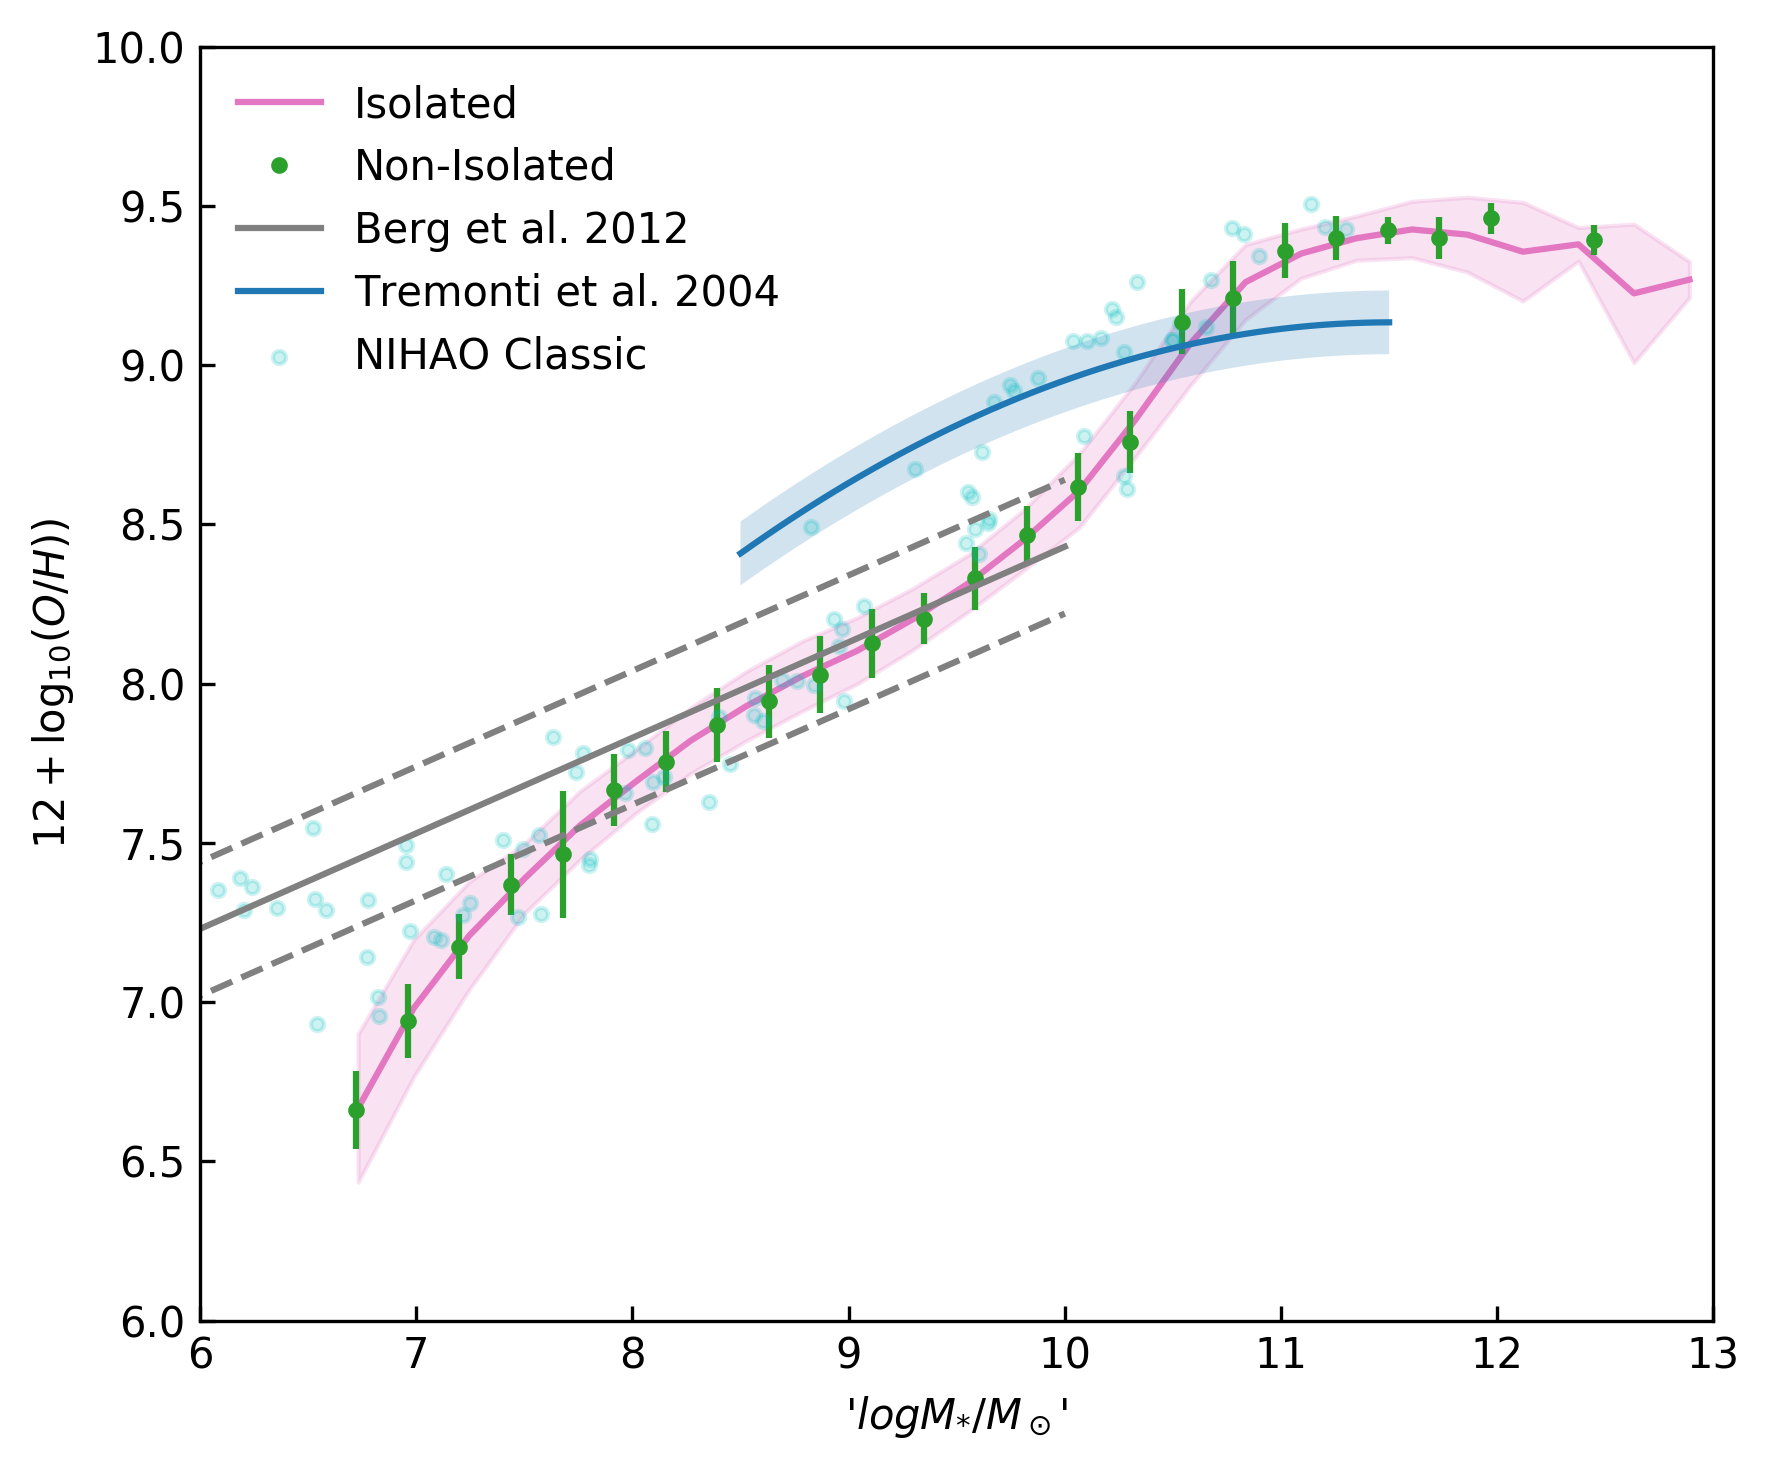

In [53]:
def BergMZR(logmstar):
    oxh = 5.43 + 0.30*logmstar
    return oxh

def TremontiFit(logmstar):
    # Valid over the range 8.5 to 11.5
    return - 1.492 + 1.847*logmstar - 0.08026*(logmstar**2)

def plotoxh(entry):
    x = entry["mstar"]
    values = entry["oxh"]
    x, values = do_filter(np.log10(np.array(x, dtype=float)), np.array(values, dtype=float), 1e-5)

    return bin_stats(x, values)
    
fig, ax = plt.subplots(figsize=(6,5), dpi = 300)

ci, mi, si = plotoxh(entry_iso)
cn, mn, sn = plotoxh(entry_non)

ax.plot(ci, mi, color="tab:pink", label = "Isolated", zorder = 0)
ax.fill_between(ci, mi+si, mi-si, color = "tab:pink", alpha = 0.2, zorder = -1)
ax.plot(cn, mn, color = "tab:green", marker = '.', ls = 'None', label = "Non-Isolated", zorder = 2)
ax.errorbar(cn, mn, yerr=sn, color = "tab:green", ls = 'None', zorder = 1)

ax.plot(np.linspace(5, 10), BergMZR(np.linspace(5, 10)), color = "grey", label = "Berg et al. 2012")
ax.plot(np.linspace(5, 10), BergMZR(np.linspace(5, 10)) + 0.21, color = "grey", linestyle = "--")
ax.plot(np.linspace(5, 10), BergMZR(np.linspace(5, 10)) - 0.21, color = "grey", linestyle = "--")

tremontiy = TremontiFit(np.linspace(8.5, 11.5))
ax.plot(np.linspace(8.5,11.5), tremontiy, label = "Tremonti et al. 2004")
ax.fill_between(np.linspace(8.5, 11.5), tremontiy+0.1, tremontiy-0.1, alpha = 0.2)

nihao_x = plot_tools.nihao('mstar',0)
nihao_y = plot_tools.nihao('oxh',0)

ax.axis([6, 13, 6, 10])

ax.scatter(np.log10(nihao_x), nihao_y, 10, color='c', label = "NIHAO Classic", alpha = 0.2)

ax.set(xlabel = "'$ log M_{*}/M_\odot$'", ylabel = '$12+\log_{10}(O/H))$')
ax.legend(frameon=False)
ax.tick_params(direction='in', which='both')
plt.tight_layout()
plt.savefig("/scratch/hc2347/reports/oxh_isolated.png")

[1039.  488.  273.    0.    0.    0.    0.  410.  667.  213.   18.    2.
  557.  192.   22.  284.  104.  126.  154.  120.  117.  144.   78.   89.
   92.   93.   98.  100.   98.   86.   83.   65.   57.   45.   39.   41.
   48.   49.   57.   35.   29.   27.   27.   27.   39.   30.   36.   33.
   40.   31.] [-1.27963162 -1.23869733 -1.19776305 -1.15682877 -1.11589449 -1.07496021
 -1.03402593 -0.99309165 -0.95215736 -0.91122308 -0.8702888  -0.82935452
 -0.78842024 -0.74748596 -0.70655167 -0.66561739 -0.62468311 -0.58374883
 -0.54281455 -0.50188027 -0.46094598 -0.4200117  -0.37907742 -0.33814314
 -0.29720886 -0.25627458 -0.21534029 -0.17440601 -0.13347173 -0.09253745
 -0.05160317 -0.01066889  0.03026539  0.07119968  0.11213396  0.15306824
  0.19400252  0.2349368   0.27587108  0.31680537  0.35773965  0.39867393
  0.43960821  0.48054249  0.52147677  0.56241106  0.60334534  0.64427962
  0.6852139   0.72614818]


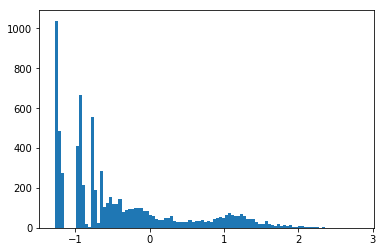

In [48]:
xi, yi = do_filter(entry_iso['mstar'], entry_iso['sfr_10'], 0)

xi = np.log10(xi)
yi = np.log10(yi)

xi, yi = do_filter(xi, yi, -1.19)

xn, yn = do_filter(entry_non['mstar'], entry_non['sfr_10'], 0)

xn = np.log10(xn)
yn = np.log10(yn)

xn, yn = do_filter(xn, yn, -1.19)

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


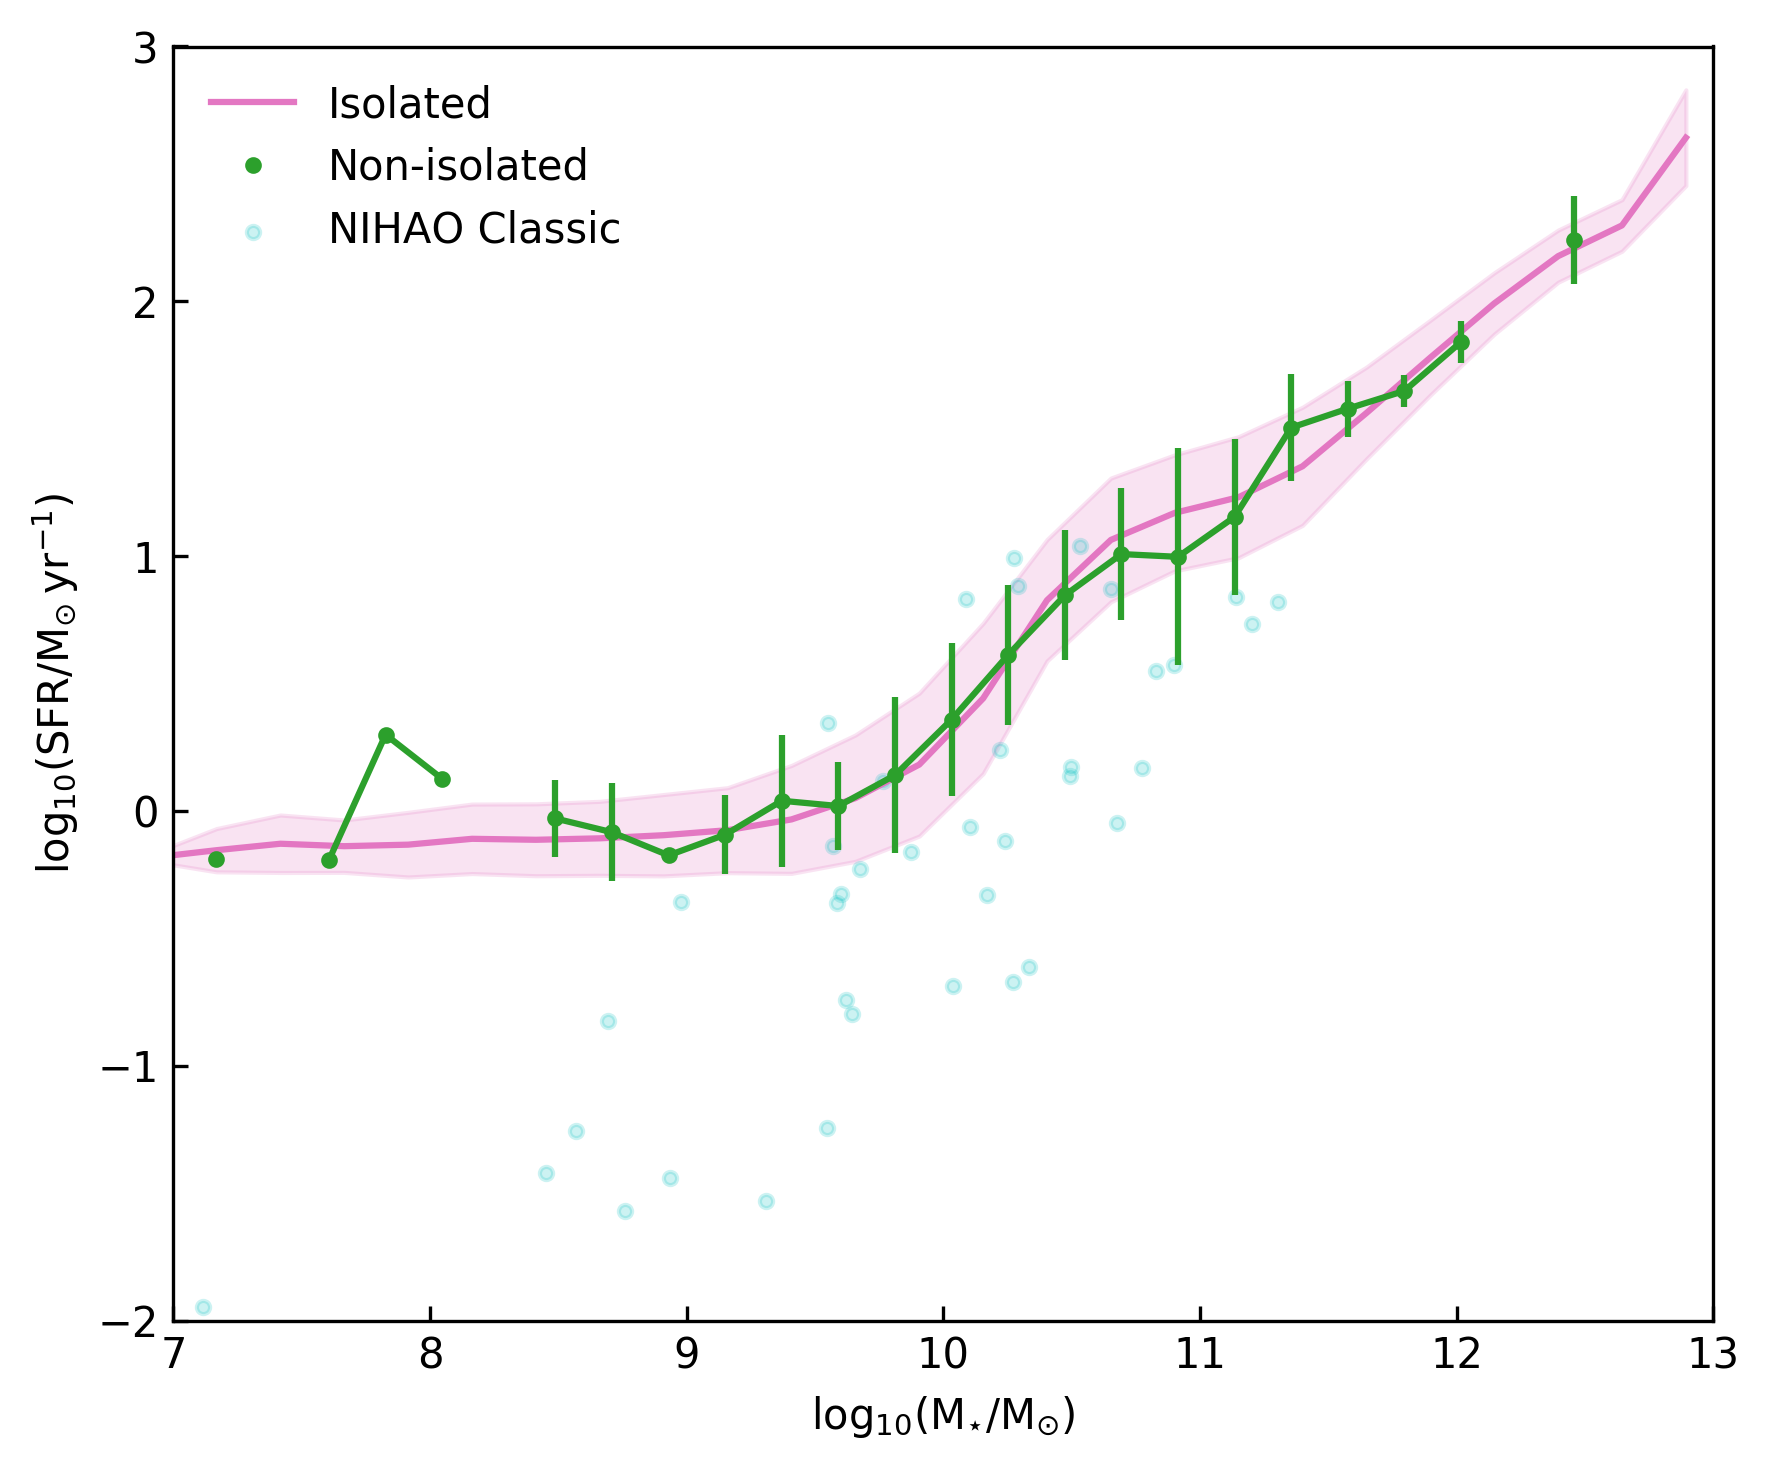

In [59]:
# x = entry['mstar']
# y = entry['sfr_100']
# x = np.log10(x)
# y = np.log10(y)
# x, y = do_filter(x,y,-10)
# n, bins, plot = plt.hist(y, bins = 100)
# lowerlim = bins[22]
# x, y = do_filter(x, y, lowerlim)

# sfrc, sfrm, sfrs = bin_stats(x, y)
sfrci, sfrmi, sfrsi = bin_stats(xi, yi)
sfrcn, sfrmn, sfrsn = bin_stats(xn, yn)

def elbaz_sdss(logmstar):
    fit = lambda x: np.log10(x*(10**(logmstar-11))**0.77)
    return fit(8.7), fit(8.7+7.4), fit(8.7-3.7)

def noeske(logmstar):
    fit = lambda x, y: x*logmstar - y
    return fit(0.67, 6.19), fit(0.67+ 0.08, 6.19+0.78), fit(0.67 - 0.08, 6.19 - 0.78)

fig, ax = plt.subplots(figsize=(6,5), dpi=300)

# ax.plot(sfrc, sfrm, linestyle = "--", color = "black", label = "SALAM")
# ax.fill_between(sfrc, sfrm+sfrs, sfrm-sfrs, color = "grey", alpha = 0.2, zorder=-1)
# ax.scatter(xi, yi, alpha = 0.2)
ax.plot(sfrci, sfrmi, color = 'tab:pink', label = "Isolated")
ax.fill_between(sfrci, sfrmi + sfrsi,  sfrmi - sfrsi, color='tab:pink', alpha = 0.2)
ax.plot(sfrcn, sfrmn, marker = '.', ls = 'None', color = 'tab:green',  label = "Non-isolated", zorder = 5)
ax.errorbar(sfrcn, sfrmn, yerr= sfrsn, color='tab:green', zorder = 4)

# noy, noyu, noyd = noeske(np.linspace(10,11))
# ax.plot(np.linspace(10, 11), noy, color = "tab:orange", label="Noeske et al. 2007")
# ax.fill_between(np.linspace(10,11), noyu, noyd, color = "tab:orange", alpha = 0.5)
# elbazy, elbazyup, elbazyd = elbaz_sdss(np.linspace(9,12))
# ax.plot(np.linspace(9, 12), elbazy, color = "tab:red", label = "Elbaz et al. 2007")
# ax.fill_between(np.linspace(9,12), elbazyup, elbazyd, color = "tab:red", alpha = 0.1)

nihao_x = plot_tools.nihao('mstar',0)
nihao_y = plot_tools.nihao('sfr_10',0)
ax.scatter(np.log10(nihao_x), np.log10(nihao_y), 10, color='c', label="NIHAO Classic", alpha = 0.2)

xlabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
ylabel = '$\\rm{log_{10}(SFR/M_{\odot}\,yr^{-1})}$'

ax.set(xlabel=xlabel, ylabel=ylabel, xlim = [7, 13], ylim = [-2,3])
ax.legend(frameon=False)
ax.tick_params(direction='in', which='both')
plt.tight_layout()
plt.savefig("/scratch/hc2347/reports/sfr_isolated.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


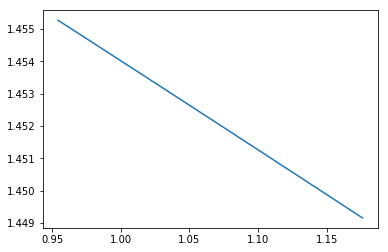

In [71]:
# Kravtsov Fit

def krav(m):
    logm1 = 11.39
    loge = -1.618
    a = 1.795
    d = 4.345
    g = 0.619
    
    f = lambda x: -np.log10(10**(a*x +1) + d*((np.log10(1 + np.exp(x)))**g)/(1+ np.exp(10**(-x))))
    logmstar = loge + logm1 + f(np.log10(m) - logm1) - f(0)
    return logmstar

x = np.linspace(9, 15)
plt.plot(np.log10(x), np.log10(krav(x)))

3818200446.0472484
9.581858724038574
14.48347053171929
98
[5.11462999e+09 1.67987740e+11 1.04948417e+10 8.83984505e+10
 2.53249108e+11 4.32887049e+11 9.90521027e+11 3.24715489e+11
 5.20432805e+11 2.53599140e+10 3.02684865e+11 2.57638789e+11
 6.32299939e+09 1.08751145e+10 3.52574634e+12 4.88381143e+10
 6.04614664e+09 2.91840058e+11 1.69816199e+10 1.37129928e+10
 1.11563546e+12 3.21854248e+10 2.21812786e+12 1.88953126e+13
 9.28030307e+10 1.31225765e+11 5.74741191e+11 1.03270545e+12
 1.40309477e+10 4.97346731e+10 5.71535671e+09 3.12608557e+09
 1.93483080e+11 6.14301163e+09 2.34365898e+12 8.92792786e+10
 4.07699334e+11 8.26250238e+11 1.47549014e+11 1.17552067e+12
 3.24962675e+11 2.13235919e+10 1.16474789e+12 4.28787947e+10
 2.67425615e+11 8.06185147e+11 2.40363351e+10 4.23347660e+11
 2.56914296e+10 8.00438321e+11 5.94943105e+09 1.57298959e+11
 1.14766016e+11 4.25341114e+10 8.95371895e+10 3.54135729e+10
 2.76814607e+10 1.65600025e+10 1.29330711e+10 3.10789377e+11
 1.45743145e+10 6.04379554e

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


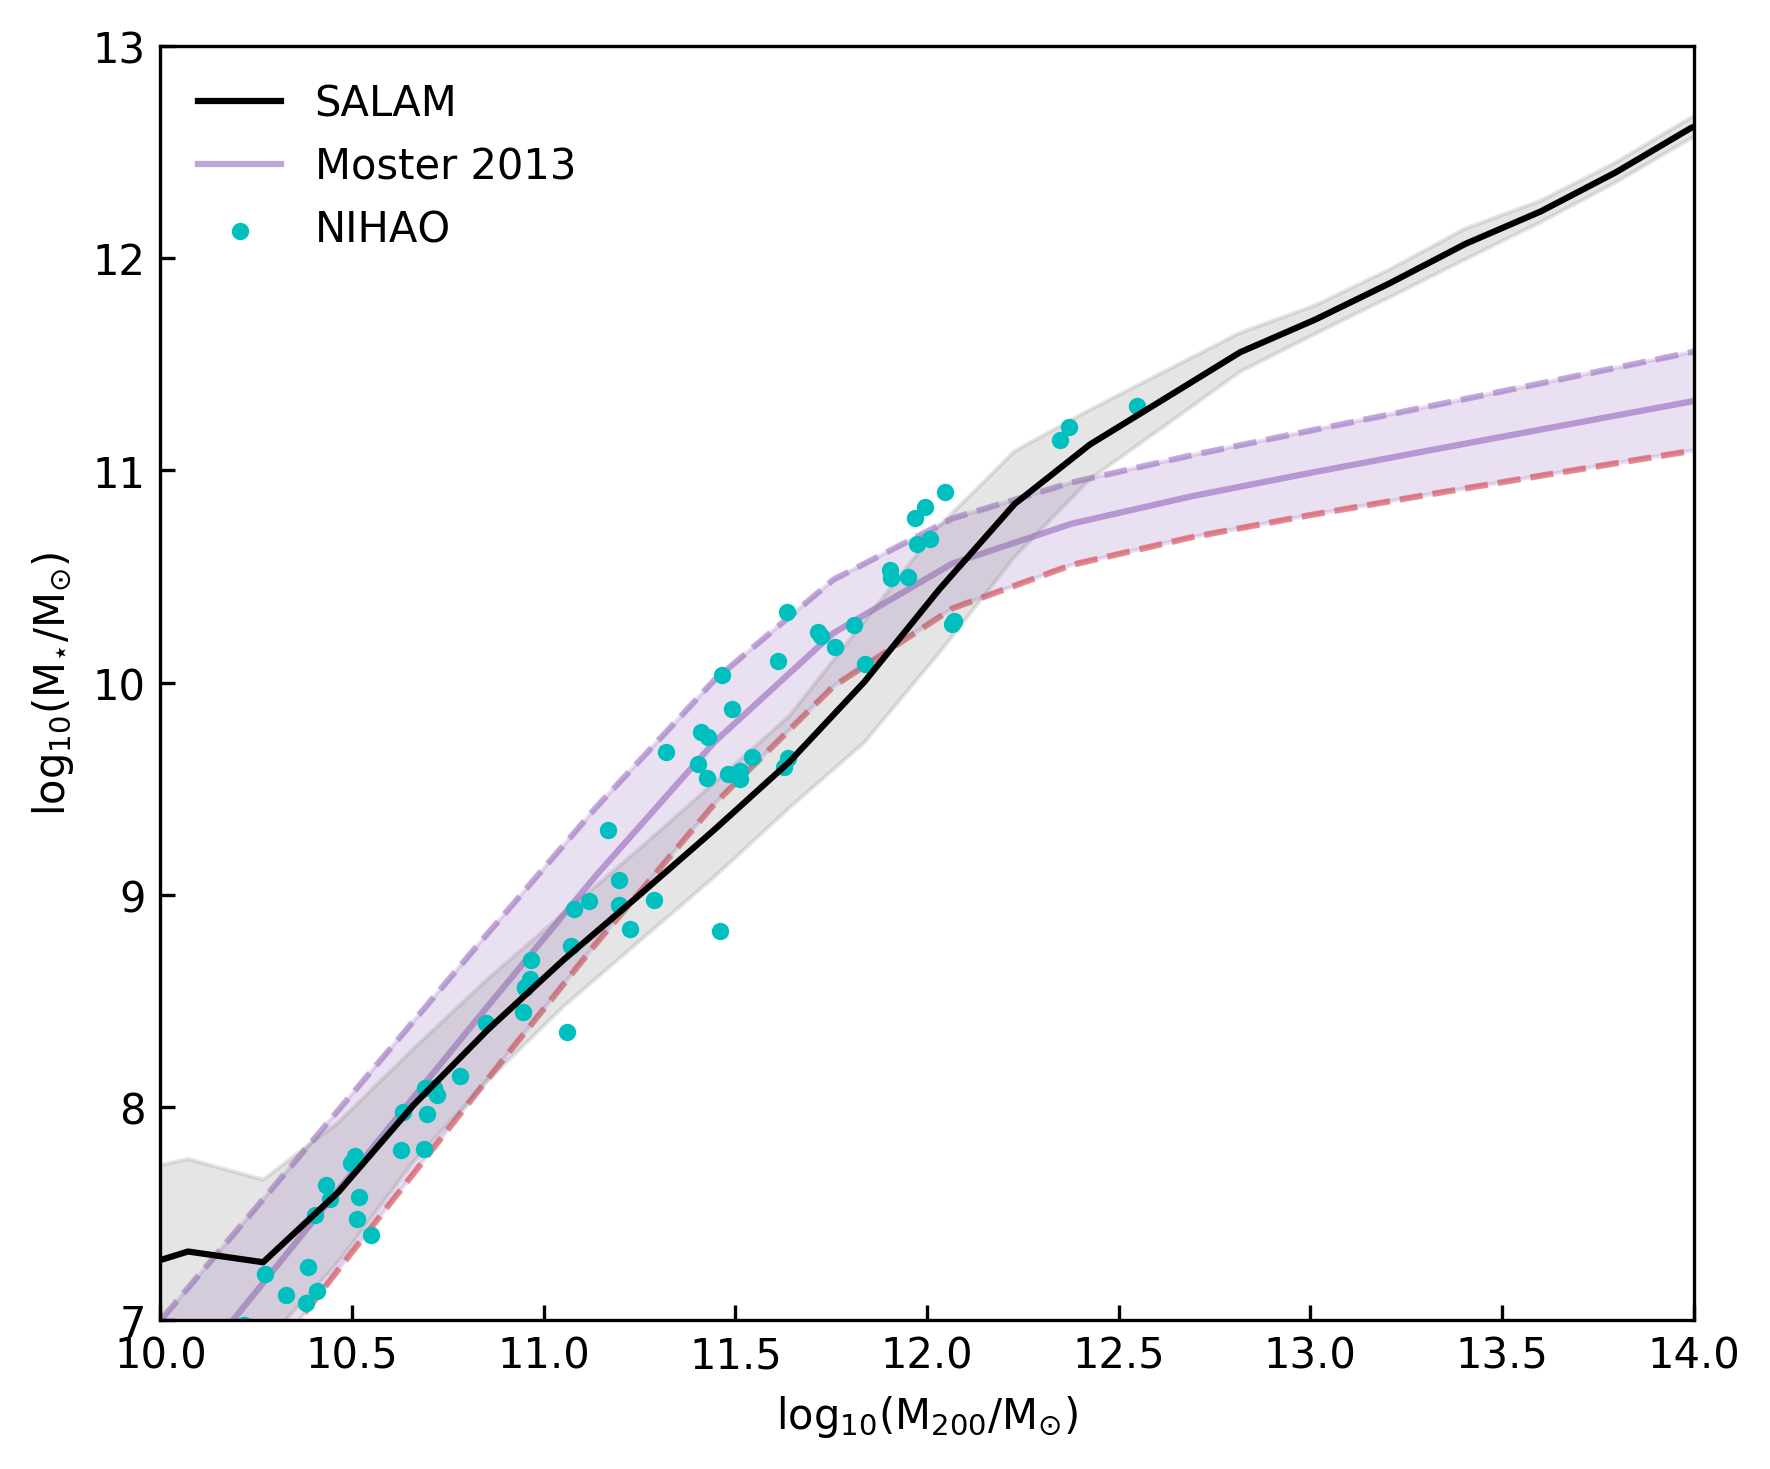

In [21]:
# Moster
from pynbody.plot.stars import moster

z = entry["zred"]
x, y = do_filter(entry['mvir'], entry['mstar'], 1e-5)

xlabel = '$\\rm{log_{10}}(M_{200}/\\rm M_{\odot})$'
ylabel = '$\\rm{log_{10}}(M_{\star}/\\rm M_{\odot})$'
label = '$z \;=\; {}$'.format(z)

mc, mm, mstd = bin_stats(np.log10(x),np.log10(y))

fig, ax = plt.subplots(figsize=(6,5), dpi = 300)
ax.plot(mc, mm, c='black', label = "SALAM")
ax.fill_between(mc, mm + mstd, mm - mstd, color ='grey', alpha = 0.2)

xmasses = np.logspace(np.log10(min(x)),1+np.log10(max(x)),20)
ystarmasses, errors = moster(xmasses,float(entry["zred"]))
ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)),color="tab:purple",label="Moster 2013", zorder = -2, alpha = 0.6)
ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)/np.array(errors)), linestyle='dashed', color = 'tab:red', zorder = -2, alpha = 0.5)
ax.plot(np.log10(xmasses),np.log10(np.array(ystarmasses)*np.array(errors)), linestyle='dashed', color = 'tab:purple', zorder = -2, alpha = 0.5)
ax.fill_between(np.log10(xmasses),np.log10(np.array(ystarmasses)/np.array(errors)),y2=np.log10(np.array(ystarmasses)*np.array(errors)),
                color='tab:purple', alpha=0.2, zorder = -3)

path = "/scratch/hc2347/pickles/nihao/pickle_NIHAO_2.p"
nihao_mstar = plot_tools.nihao('mstar',0)
nihao_mhalo = plot_tools.nihao('mvir',0)
ax.scatter(np.log10(nihao_mhalo), np.log10(nihao_mstar), 10, label = 'NIHAO', color = 'c', alpha = 1)

iso_mvir, iso_mstar = do_filter(entry_iso['mvir'], entry_iso['mstar'], 1e-5)
non_mvir, non_mstar = do_filter(entry_non['mvir'], entry_non['mstar'], 1e-5)
imc, imm, imstd = bin_stats(np.log10(iso_mvir), np.log10(iso_mstar))
nmc, nmm, nmstd = bin_stats(np.log10(non_mvir), np.log10(non_mstar))

# ax.plot(imc, imm, color = 'tab:pink', label = "Isolated")
# ax.plot(nmc, nmm, marker = '.', color = 'tab:green', label = "Non-Isolated")
# ax.fill_between(imc, imm + imstd, imm-imstd, linestyle='None', color = 'tab:pink', alpha = 0.2, zorder = 0)
# ax.errorbar(nmc, nmm, yerr=nmstd, linestyle ="None", color = 'tab:green', zorder = -1)


ax.axis([10, 14.5, 7, 13])
ax.legend(frameon=False)
ax.tick_params(direction='in', which='both')
ax.set(xlabel=xlabel, ylabel=ylabel, xlim = (10, 14))
plt.tight_layout()

#plt.savefig("/scratch/hc2347/reports/moster.png")

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


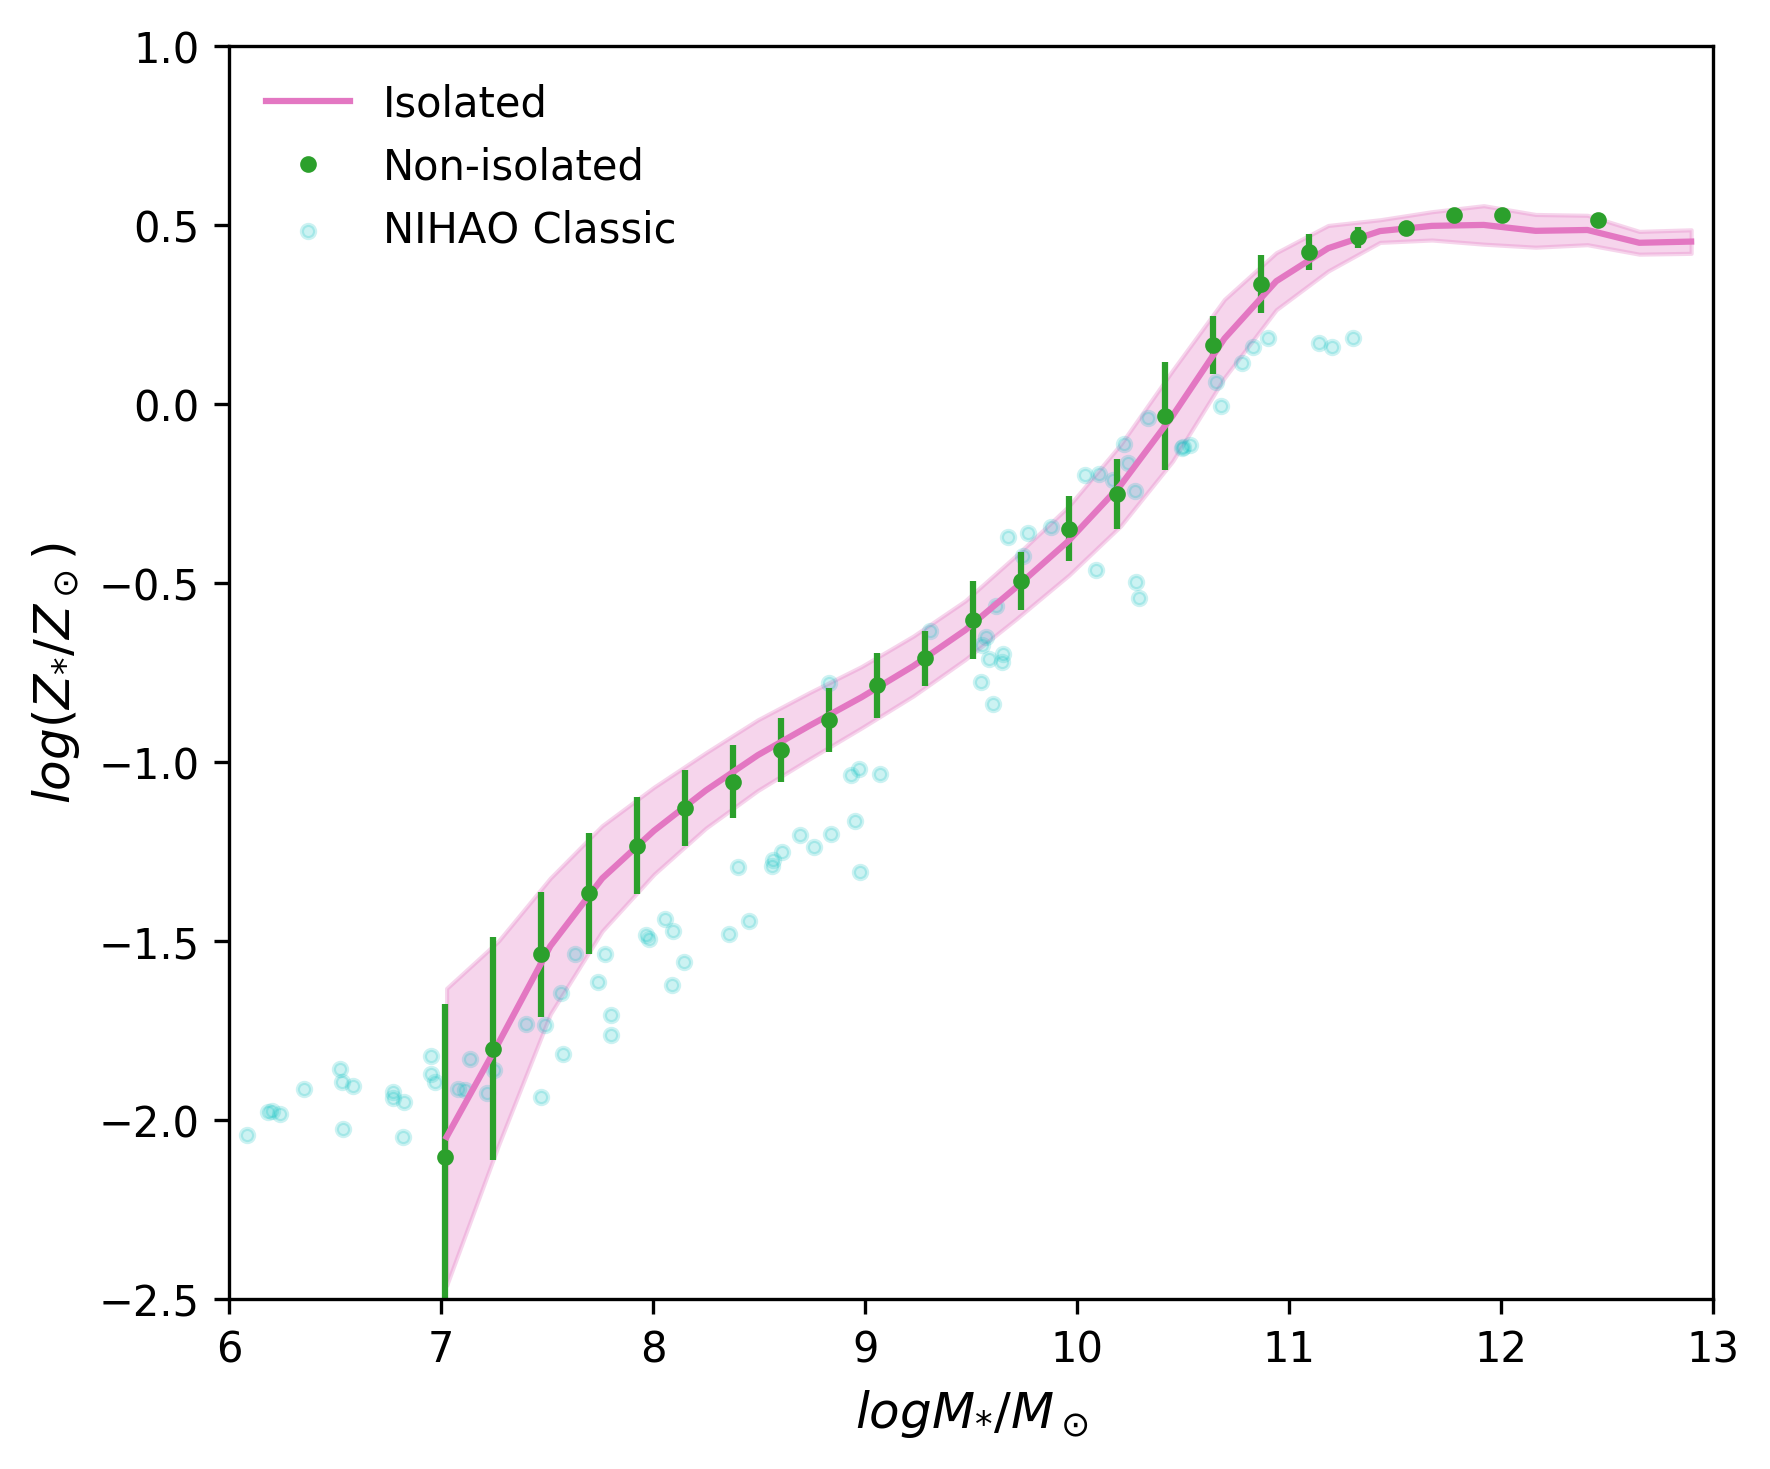

In [60]:
z_sol = 0.013 # primordial Solar metallicity

def panter(logmstar):
    logmc = 9.66
    d = 1.04
    a = -0.4542
    b = 0.572
    return a + b*np.tanh((logmstar - logmc)/d)


x, y = do_filter(entry['mstar'], entry['zstar'], 1e-5)
zsc, zsm, zsstd = bin_stats(np.log10(x), np.log10(y/z_sol))

xi, yi = do_filter(entry_iso['mstar'], entry_iso['zstar'], 1e-5)
izsc, izsm, izsstd = bin_stats(np.log10(xi), np.log10(yi/z_sol))

xn, yn = do_filter(entry_non['mstar'], entry_non['zstar'], 1e-5)
nzc, nzm, nzstd = bin_stats(np.log10(xn), np.log10(yn/z_sol))

gallazzi = np.genfromtxt('/scratch/hc2347/main/visualization/obs/Gallazzi_2005_SMZ_z0.csv',unpack=True,skip_header=2,delimiter=',')
logmstar_tr = gallazzi[0]

median_tr = gallazzi[1]
sixteen_tr = gallazzi[2]
eightyfour_tr = gallazzi[3]

fig, ax = plt.subplots(figsize=(6,5), dpi = 300)

# ax.plot(zsc, zsm, label = "SALAM", color = "black")
# ax.fill_between(zsc, zsm+zsstd, zsm-zsstd, color = "grey", alpha = 0.4)

ax.plot(izsc, izsm, color = "tab:pink", label="Isolated")
ax.fill_between(izsc, izsm + izsstd,izsm - izsstd, color = 'tab:pink', alpha = 0.3)
ax.plot(nzc, nzm, marker = '.', linestyle = 'None', color = "tab:green", label="Non-isolated")
ax.errorbar(nzc, nzm, yerr=nzstd, linestyle = 'None', color = 'tab:green')

nihao_x = np.array(plot_tools.nihao('mstar',0))
nihao_y = np.array([np.sum(z_vals) for z_vals in plot_tools.nihao('z_star',0)])    
ax.scatter(np.log10(nihao_x), np.log10(nihao_y/z_sol), 10, color='c', label = "NIHAO Classic", alpha = 0.2)

# ax.plot(np.linspace(8.8, 11.8), panter(np.linspace(8.8, 11.8)), label = "Panter+2008")

# ax.plot(logmstar_tr, median_tr, c='grey',label = "Gallazzi+ 2005")
# ax.plot(logmstar_tr, sixteen_tr, linestyle='dashed',color='grey')
# ax.plot(logmstar_tr, eightyfour_tr, linestyle='dashed',color='grey')
# ax.fill_between(logmstar_tr, sixteen_tr, y2 = eightyfour_tr, alpha = 0.2, color='grey', zorder = -1)

ax.set_ylabel('$log(Z_{*}/Z_\odot)$',fontsize=12)
ax.set_xlabel('$ log M_{*}/M_\odot$',fontsize=12)
ax.set(xlim = (6,13), ylim = (-2.5, 1))
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("/scratch/hc2347/reports/zstar_isolated.png")

In [29]:
len(entry_non)

22